In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# ===GDP===
# read data
os.chdir('/home/shensir/Documents/MyPrograming/Python/PycharmProject/MySpider/Stock/src')
gdp_df = pd.read_csv('../data/gdp_q4_processed.csv')
gdp_df.index = gdp_df['date']
gdp_df.drop(['date'], inplace=True, axis=1)
gdp_df.head()

,gdp,gdp_rate
date,,
1992Q1,5262.8,0.250000
1992Q2,6484.3,0.250000
1992Q3,7192.6,0.250000
1992Q4,8254.8,0.250000
1993Q1,6834.6,0.298662


In [7]:
# ===Stock===
stock_df = pd.read_csv('../data/stock_processed.csv')
stock_df.index = stock_df['date']
stock_df.drop('date',inplace=True, axis=1)
stock_df.head()

,year,close,trade_times,trade_money
date,,,,
1992Q1,1992.0,339.611967,4.698902e+05,8.773705e+06
1992Q2,1992.0,778.056406,3.715642e+06,7.651284e+07
1992Q3,1992.0,928.480909,8.362256e+06,1.269380e+08
1992Q4,1992.0,604.371875,1.571860e+07,1.770287e+08
1993Q1,1993.0,1182.115574,4.465464e+07,8.546447e+08


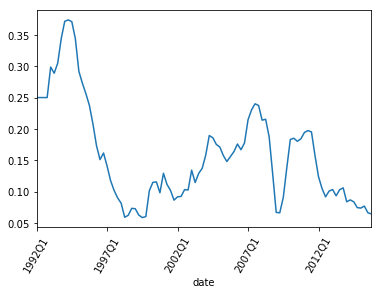

In [9]:
plt.figure()
# plt.subplot(121)
gdp_df['gdp_rate'].plot()
plt.xticks(rotation=60)
# plt.subplot(122)
# stock_df['close'].plot()
# plt.xticks(rotation=60)
# plt.subplots_adjust(left=0.2, wspace=0.3, top=0.8)
plt.show()

In [14]:
### 选取1998-2014
data = pd.concat([gdp_df.loc['1998Q1':'2014Q4'], stock_df.loc['1998Q1':'2014Q4']], axis=1)
data.head()

,gdp,gdp_rate,year,close,trade_times,trade_money
date,,,,,,
1998Q1,18049.1,0.081490,1998.0,1212.777731,4.150183e+08,4.453512e+09
1998Q2,20296.6,0.059123,1998.0,1353.313203,8.650186e+08,7.784021e+09
1998Q3,21775.6,0.062178,1998.0,1242.377197,5.720185e+08,4.449456e+09
1998Q4,25074.2,0.073313,1998.0,1227.214984,4.852628e+08,4.308763e+09
1999Q1,19361.9,0.072735,1999.0,1141.768320,5.138045e+08,3.505024e+09


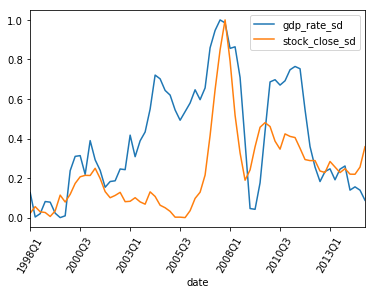

In [15]:
sd_data = pd.DataFrame()
sd_data['gdp_rate_sd'] = (data['gdp_rate']-data['gdp_rate'].min())/(data['gdp_rate'].max()-data['gdp_rate'].min())
sd_data['stock_close_sd'] = (data['close']-data['close'].min())/(data['close'].max()-data['close'].min())
sd_data.plot()
plt.xticks(rotation=60)
plt.show()

In [16]:
data.to_csv('../data/stock_gdp.csv')